In [169]:
import numpy as np
import f90nml
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches


In [170]:
nml    = f90nml.read('par11')
infile = nml['filename_par']['outfilename']
rdim = nml['cal_par']['dim_ra']
tdim = nml['cal_par']['dim_th']
pdim = nml['cal_par']['dim_ph']
thstart = nml['cal_par']['th_start']
phstart = nml['cal_par']['ph_start']
rastart = nml['cal_par']['ra_start']
thend   = nml['cal_par']['th_end']
phend   = nml['cal_par']['ph_end']
raend   = nml['cal_par']['ra_end']
nlevel = nml['cal_par']['nlevel']

rdim = 1
tdim = 20001
pdim = 1

f    = open(infile,'rb')
data = np.fromfile(f, dtype=np.double, count=rdim*tdim*pdim*3)
q    = np.reshape(data,(3,pdim,tdim,rdim))
q_cal_11=np.flip(np.abs(q[0,0,:,0]))
t11=np.linspace(thstart,thend,tdim)

In [171]:
q.shape

(3, 1, 20001, 1)

In [172]:
nml    = f90nml.read('par9')
infile = nml['filename_par']['outfilename']
rdim = nml['cal_par']['dim_ra']
tdim = nml['cal_par']['dim_th']
pdim = nml['cal_par']['dim_ph']
thstart = nml['cal_par']['th_start']
phstart = nml['cal_par']['ph_start']
rastart = nml['cal_par']['ra_start']
thend   = nml['cal_par']['th_end']
phend   = nml['cal_par']['ph_end']
raend   = nml['cal_par']['ra_end']
nlevel = nml['cal_par']['nlevel']

pdim = 1
tdim = 3205
rdim = 1
f    = open(infile,'rb')
data = np.fromfile(f, dtype=np.double, count=rdim*tdim*pdim*3)
q    = np.reshape(data,(3,pdim,tdim,rdim))
q_cal_05=np.flip(np.abs(q[0,0,:,0]))

nml    = f90nml.read('par10')
infile = nml['filename_par']['outfilename']
rdim = nml['cal_par']['dim_ra']
tdim = nml['cal_par']['dim_th']
pdim = nml['cal_par']['dim_ph']
thstart = nml['cal_par']['th_start']
phstart = nml['cal_par']['ph_start']
rastart = nml['cal_par']['ra_start']
thend   = nml['cal_par']['th_end']
phend   = nml['cal_par']['ph_end']
raend   = nml['cal_par']['ra_end']
nlevel = nml['cal_par']['nlevel']

pdim = 1
tdim = 3205
rdim = 1
f    = open(infile,'rb')
data = np.fromfile(f, dtype=np.double, count=rdim*tdim*pdim*3)
q    = np.reshape(data,(3,pdim,tdim,rdim))
q_cal_20=np.flip(np.abs(q[0,0,:,0]))


nml    = f90nml.read('par8')
infile = nml['filename_par']['outfilename']
rdim = nml['cal_par']['dim_ra']
tdim = nml['cal_par']['dim_th']
pdim = nml['cal_par']['dim_ph']
thstart = nml['cal_par']['th_start']
phstart = nml['cal_par']['ph_start']
rastart = nml['cal_par']['ra_start']
thend   = nml['cal_par']['th_end']
phend   = nml['cal_par']['ph_end']
raend   = nml['cal_par']['ra_end']
nlevel = nml['cal_par']['nlevel']

pdim = 1
tdim = 3205
rdim = 1
f    = open(infile,'rb')
data = np.fromfile(f, dtype=np.double, count=rdim*tdim*pdim*3)
q    = np.reshape(data,(3,pdim,tdim,rdim))
q_cal_50=np.flip(np.abs(q[0,0,:,0]))

In [173]:
nml    = f90nml.read('par3')
infile = nml['filename_par']['outfilename']
rdim = nml['cal_par']['dim_ra']
tdim = nml['cal_par']['dim_th']
pdim = nml['cal_par']['dim_ph']
thstart = nml['cal_par']['th_start']
phstart = nml['cal_par']['ph_start']
rastart = nml['cal_par']['ra_start']
thend   = nml['cal_par']['th_end']
phend   = nml['cal_par']['ph_end']
raend   = nml['cal_par']['ra_end']
nlevel = nml['cal_par']['nlevel']

pdim = 1
tdim = 3205
rdim = 1
f    = open(infile,'rb')
data = np.fromfile(f, dtype=np.double, count=rdim*tdim*pdim*3)
q    = np.reshape(data,(3,pdim,tdim,rdim))
q_cal=np.flip(np.abs(q[0,0,:,0]))



In [174]:
tarray=np.linspace(thstart,thend,tdim)
R1=2.5
R0=1.01
C=np.exp(0.266657)

In [175]:
def Br(rIn,tIn):
	out=4/129*(125/(4*rIn**3)+1)*np.cos(tIn)
	return out
def Bt(rIn,tIn):
	out=4/(129*rIn)*(125/(8*rIn**2)-rIn)*np.sin(tIn)
	return out

In [176]:
def ana_Q(tIn):
    brt0=Br(R0,tIn)
    btt0=Bt(R0,tIn)
    bnt0=np.sqrt(brt0**2+btt0**2)
    brt1=Br(R1,np.arcsin(C*np.sin(tIn)))
    btt1=Bt(R1,np.arcsin(C*np.sin(tIn)))
    bnt1=np.abs(brt1)
    dett=np.divide(bnt0,bnt1)
    N2t=R1**2/R0**2*C**2*(1+np.cos(tIn)**2/(1-C**2*np.sin(tIn)**2)*(1+btt0**2/brt0**2))
    out=N2t/dett
    out2=np.where(out>0,out,2)
    return out2

In [177]:
br0=Br(R0,tarray)
bt0=Bt(R0,tarray)
bn0=np.sqrt(br0**2+bt0**2)

br1=Br(R1,np.arcsin(C*np.sin(tarray)))
bt1=Bt(R1,np.arcsin(C*np.sin(tarray)))
bn1=np.abs(br1)

/var/folders/rr/2n3c73qx6r141zscx2v__r9w0000gn/T/ipykernel_35899/4150991739.py:5: RuntimeWarning: invalid value encountered in arcsin
  br1=Br(R1,np.arcsin(C*np.sin(tarray)))
/var/folders/rr/2n3c73qx6r141zscx2v__r9w0000gn/T/ipykernel_35899/4150991739.py:6: RuntimeWarning: invalid value encountered in arcsin
  bt1=Bt(R1,np.arcsin(C*np.sin(tarray)))


In [178]:
det=np.divide(bn0,bn1)
N2=R1**2/R0**2*C**2*(1+np.cos(tarray)**2/(1-C**2*np.sin(tarray)**2)*(1+bt0**2/br0**2))
mark=np.where(N2<0)[0][0]
q_ana=N2/det

In [179]:
ttt=np.linspace(0.85,0.89,10000000)

/var/folders/rr/2n3c73qx6r141zscx2v__r9w0000gn/T/ipykernel_35899/1327456696.py:5: RuntimeWarning: invalid value encountered in arcsin
  brt1=Br(R1,np.arcsin(C*np.sin(tIn)))
/var/folders/rr/2n3c73qx6r141zscx2v__r9w0000gn/T/ipykernel_35899/1327456696.py:6: RuntimeWarning: invalid value encountered in arcsin
  btt1=Bt(R1,np.arcsin(C*np.sin(tIn)))


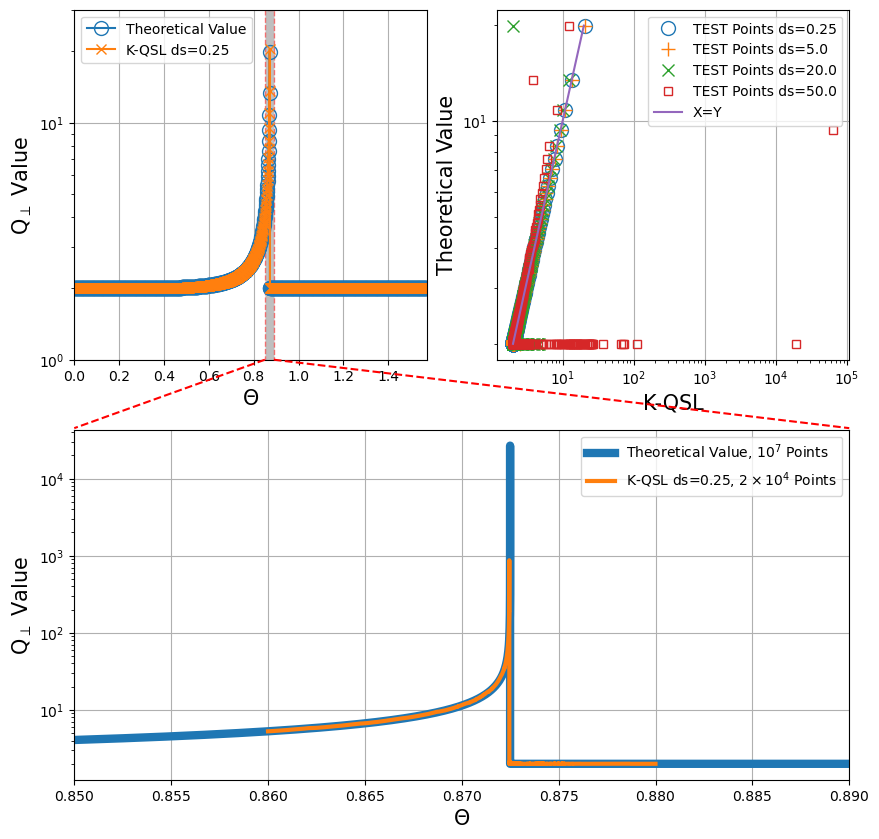

In [180]:
fig=plt.figure(figsize=(10,10))
# plt.subplot(221)
ax1 = fig.add_subplot(221)

q_ana_real=np.where(q_ana>0,q_ana,2)
plt.plot(tarray,q_ana_real, marker='o', linestyle='-', markerfacecolor='none',markersize=10,label='Theoretical Value')

plt.plot(tarray,10**q_cal,'-x',markersize=7,label='K-QSL ds=0.25')
plt.xlim([0,0.5*np.pi])
plt.ylim([1,30])
plt.yscale("log")
plt.legend()


ax1.add_patch(patches.Rectangle((0.85, 0), 0.89-0.85, 30-0,edgecolor='red',facecolor='gray',linestyle='dashed',alpha=0.5))

plt.xlabel(r'$\Theta$',fontsize=15)
plt.ylabel(r'Q$_{\perp}$ Value',fontsize=15)
plt.grid()

plt.subplot(222)
plt.plot(10**q_cal[:1602],q_ana_real[:1602], marker='o', linestyle='', markerfacecolor='none',markersize=10,label='TEST Points ds=0.25')
plt.plot(10**q_cal_05[:1602],q_ana_real[:1602], marker='+', linestyle='', markerfacecolor='none',markersize=10,label='TEST Points ds=5.0')
plt.plot(10**q_cal_20[:1602],q_ana_real[:1602], marker='x', linestyle='', markerfacecolor='none',markersize=8,label='TEST Points ds=20.0')
plt.plot(10**q_cal_50[:1602],q_ana_real[:1602], marker='s', linestyle='', markerfacecolor='none',markersize=6,label='TEST Points ds=50.0')

plt.plot(np.linspace(q_ana_real.min(),q_ana_real.max(),10),np.linspace(q_ana_real.min(),q_ana_real.max(),10),label='X=Y')
plt.xlabel('K-QSL',fontsize=15)
plt.ylabel('Theoretical Value',fontsize=15)
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')

ax2 = fig.add_subplot(212)
plt.plot(ttt,ana_Q(ttt),linewidth=6,label=r'Theoretical Value, 10$^7$ Points')
plt.plot(t11,10**q_cal_11,linewidth=3,label=r'K-QSL ds=0.25, $2\times10^4$ Points')
plt.legend()
plt.xlabel(r'$\Theta$',fontsize=15)
plt.ylabel(r'Q$_{\perp}$ Value',fontsize=15)
plt.yscale('log')
plt.grid()
plt.xlim([0.85,0.89])

# Point in ax1 to connect
x_target1, y_target1 = 0.85, 1
# Point in ax2 to connect
x_target2, y_target2 = 0.85, 4.5e4

# Convert point in ax1 to figure coordinates
coordsA = "data"
coordsB = "data"
ax1_to_fig = ax1.transData.transform((x_target1, y_target1))
ax1_to_fig = fig.transFigure.inverted().transform(ax1_to_fig)

# Convert point in ax2 to figure coordinates
ax2_to_fig = ax2.transData.transform((x_target2, y_target2))
ax2_to_fig = fig.transFigure.inverted().transform(ax2_to_fig)

# Create the line
line = plt.Line2D((ax1_to_fig[0], ax2_to_fig[0]), 
                  (ax1_to_fig[1], ax2_to_fig[1]),
                  transform=fig.transFigure, 
                  color='red',linestyle='dashed')
fig.lines.extend([line])


# Point in ax1 to connect
x_target1, y_target1 = 0.89, 1
# Point in ax2 to connect
x_target2, y_target2 = 0.89, 4.5e4

# Convert point in ax1 to figure coordinates
coordsA = "data"
coordsB = "data"
ax1_to_fig = ax1.transData.transform((x_target1, y_target1))
ax1_to_fig = fig.transFigure.inverted().transform(ax1_to_fig)

# Convert point in ax2 to figure coordinates
ax2_to_fig = ax2.transData.transform((x_target2, y_target2))
ax2_to_fig = fig.transFigure.inverted().transform(ax2_to_fig)

# Create the line
line = plt.Line2D((ax1_to_fig[0], ax2_to_fig[0]), 
                  (ax1_to_fig[1], ax2_to_fig[1]),
                  transform=fig.transFigure, 
                  color='red',linestyle='dashed')
fig.lines.extend([line])


# plt.savefig('K-QSL_vs_Theory.png',dpi=256)